# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    city_weather = requests.get(city_url)
    weather_json = city_weather.json()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greenville
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | lazaro cardenas
Processing Record 9 of Set 1 | sassandra
Processing Record 10 of Set 1 | miyako
Processing Record 11 of Set 1 | puerto san carlos
Processing Record 12 of Set 1 | hoeyang
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | mansa
Processing Record 15 of Set 1 | riohacha
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mingyue
Processing Record 19 of Set 1 | lisakovsk
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | albany
Processing Record

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greenville
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | lazaro cardenas
Processing Record 9 of Set 1 | sassandra
Processing Record 10 of Set 1 | miyako
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | hoeyang
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | mansa
Processing Record 15 of Set 1 | riohacha
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mingyue
Processing Record 19 of Set 1 | lisakovsk
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,greenville,35.6127,-77.3663,300.16,73,0,2.57,US,1715274838
1,waitangi,-43.9535,-176.5597,283.05,92,98,1.79,NZ,1715274838
2,anadyr,64.7500,177.4833,264.43,79,0,5.00,RU,1715274839
3,blackmans bay,-43.0167,147.3167,284.67,96,100,0.52,AU,1715274839
4,iqaluit,63.7506,-68.5145,272.00,74,75,2.06,CA,1715274840


In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

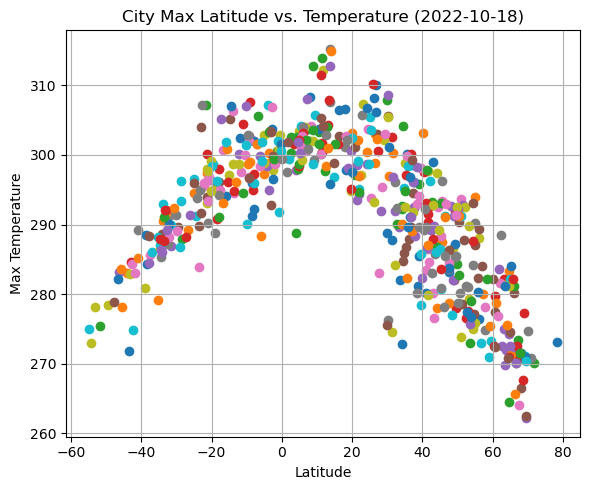

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot latitude vs. temperature in Celsius
plt.figure(figsize=(6, 5))
for city in city_data:
    plt.scatter(city['Lat'], city['Max Temp'], marker='o', label=city['City'])

# Incorporate other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
plt.savefig("Fig1.png")

#### Latitude Vs. Humidity

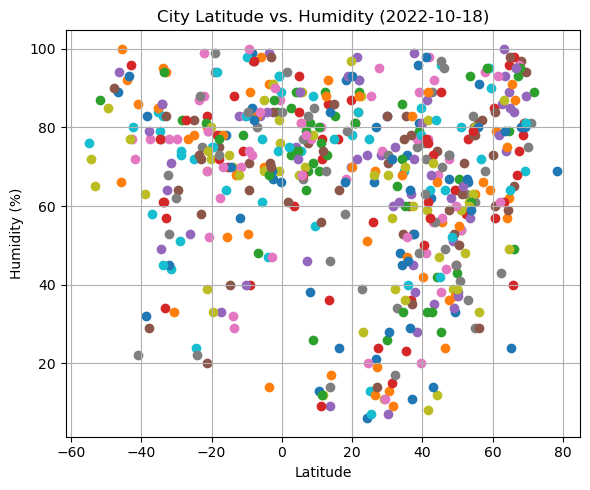

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 5))
for city in city_data:
    plt.scatter(city['Lat'], city['Humidity'], marker='o', label=city['City'])

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

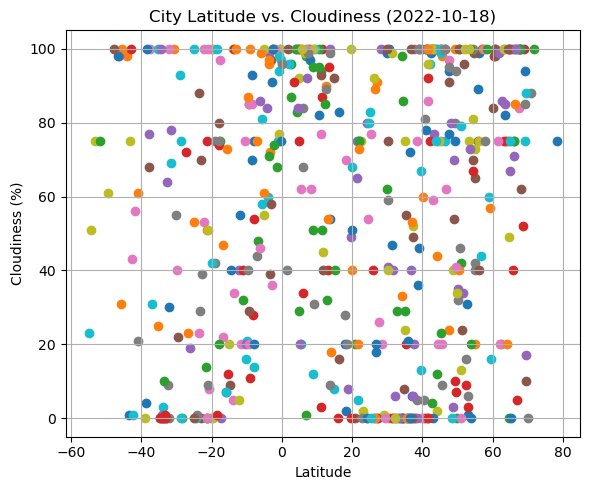

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 5))
for city in city_data:
    plt.scatter(city['Lat'], city['Cloudiness'], marker='o', label=city['City'])

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

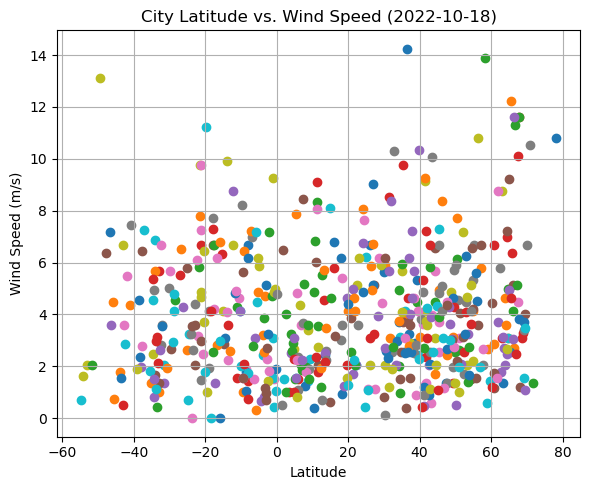

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 5))
for city in city_data:
    plt.scatter(city['Lat'], city['Wind Speed'], marker='o', label=city['City'])

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create the equation of the line to display on the plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = [city for city in city_data if city['Lat'] >= 0]

northern_hemi_df= pd.DataFrame(northern_hemisphere_data)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,greenville,35.6127,-77.3663,300.16,73,0,2.57,US,1715274838
1,anadyr,64.7500,177.4833,264.43,79,0,5.00,RU,1715274839
2,iqaluit,63.7506,-68.5145,272.00,74,75,2.06,CA,1715274840
3,lazaro cardenas,17.9583,-102.2000,301.18,58,28,3.02,MX,1715274841
4,sassandra,4.9500,-6.0833,303.44,68,92,2.66,CI,1715274841


In [14]:
southern_hemisphere_data = [city for city in city_data if city['Lat'] < 0]

southern_hemi_df= pd.DataFrame(southern_hemisphere_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,283.05,92,98,1.79,NZ,1715274838
1,blackmans bay,-43.0167,147.3167,284.67,96,100,0.52,AU,1715274839
2,arraial do cabo,-22.9661,-42.0278,304.07,58,0,3.60,BR,1715274840
3,lebu,-37.6167,-73.6500,285.66,77,100,2.78,CL,1715274841
4,invercargill,-46.4000,168.3500,283.16,94,98,3.58,NZ,1715274844


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.83


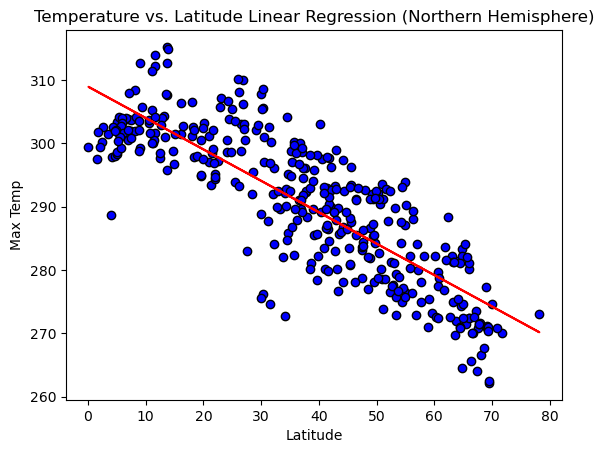

In [15]:
latitudes = northern_hemi_df['Lat']
temperatures = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, temperatures)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, temperatures, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression (Northern Hemisphere)')
plt.show()

The r-value is: 0.83


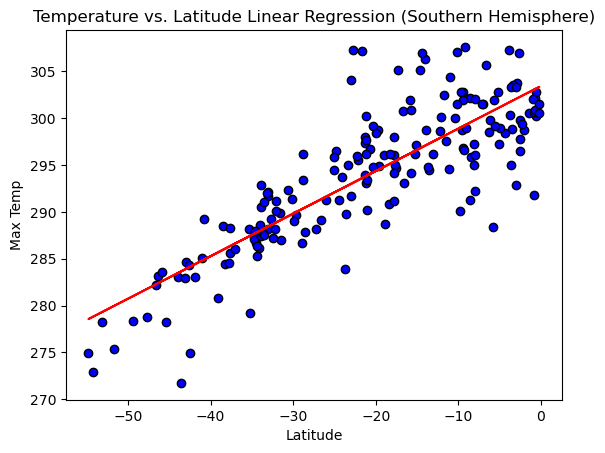

In [16]:
latitudes = southern_hemi_df['Lat']
temperatures = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, temperatures)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, temperatures, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression (Southern Hemisphere)')
plt.show()

**Discussion about the linear relationship:** 

-From what the scatter plot depicts, for the Northern Hemisphere, there is a negative correlation between latitude and the maximum temperature, the greater the latitude, the colder it becomes. In the Southern Hemisphere there is a positive correlation, increase in latitude leads to increase in maximum temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08


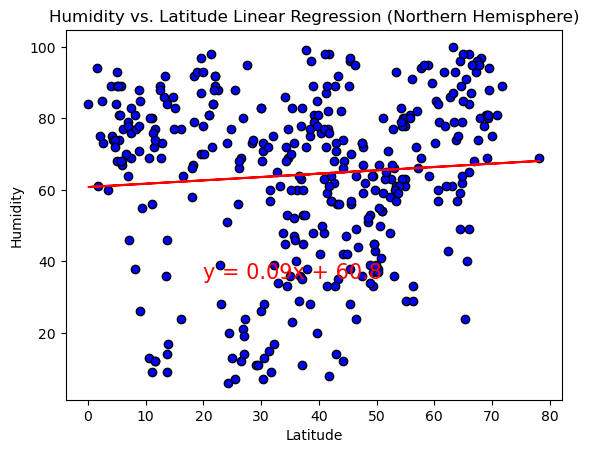

In [17]:
# Northern Hemisphere
latitudes = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, humidity)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, humidity, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression (Northern Hemisphere)')
plt.show()

The r-value is: 0.06


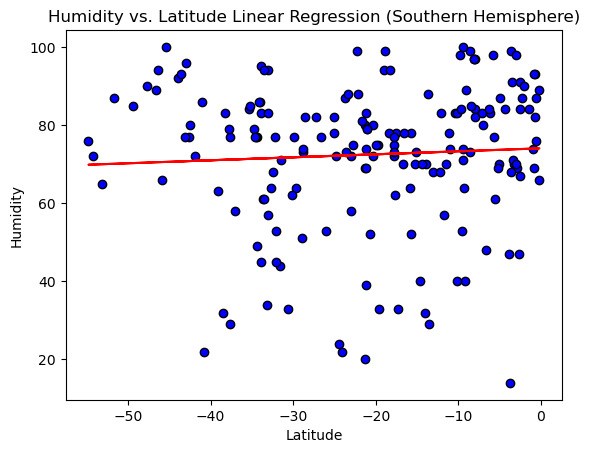

In [18]:
# Southern Hemisphere
latitudes = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, humidity)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, humidity, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression (Southern Hemisphere)')
plt.show()

**Discussion about the linear relationship:** 

-Given the scattered variables on the plot and the very small r-values between both graphs, we can determine that there is no correlation between humidity and latitude. It's more noticeably when comparing data in the Southern Hemisphere of there being a positive correlation, but its not strong enough to confirm it to be a positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05


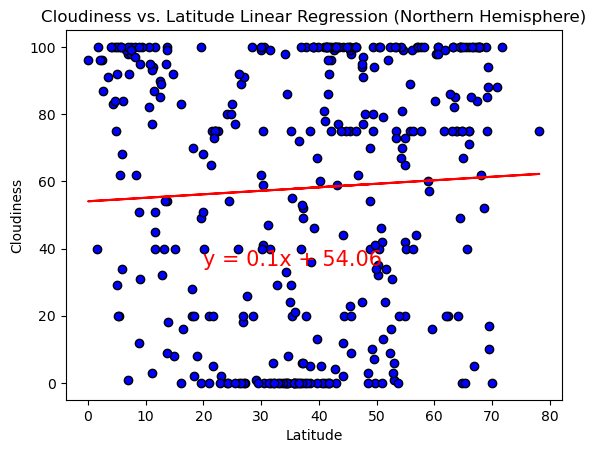

In [19]:
# Northern Hemisphere
latitudes = northern_hemi_df['Lat']
cloudiness = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, cloudiness)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, cloudiness, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)')
plt.show()

The r-value is: 0.24


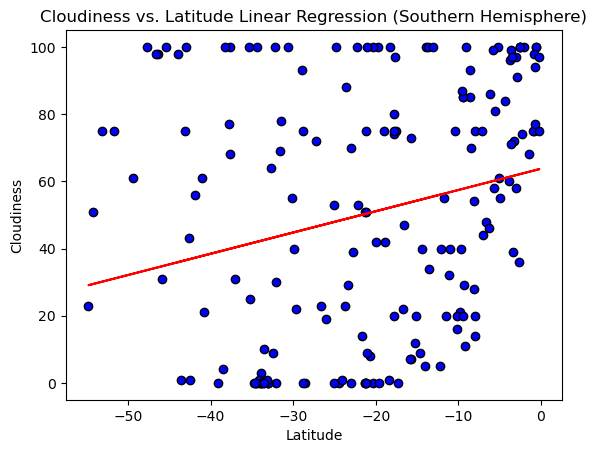

In [20]:
# Southern Hemisphere
latitudes = southern_hemi_df['Lat']
cloudiness = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, cloudiness)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, cloudiness, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)')
plt.show()

**Discussion about the linear relationship:**

-Like the previous plot, weak r-values lead to weak correlations between cloud activity and the latitude in both hemispheres. Stronger correlation in the Southern Hemisphere, but not a strong enough regression line to settle it as a positive correlation (frequent cloud activity as latitude increases). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17


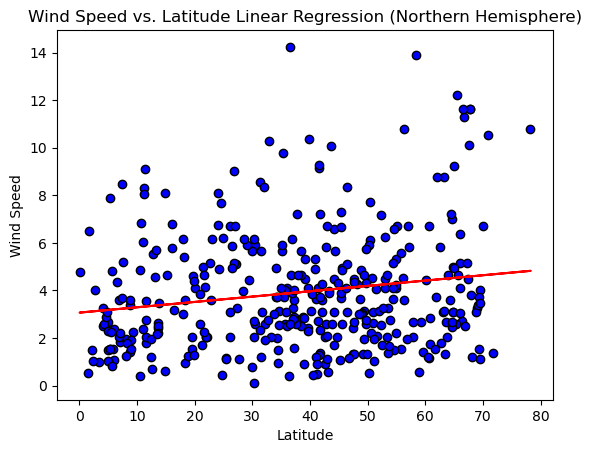

In [21]:
# Northern Hemisphere
latitudes = northern_hemi_df['Lat']
wind_speed = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, wind_speed)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, wind_speed, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)')
plt.show()

The r-value is: -0.02


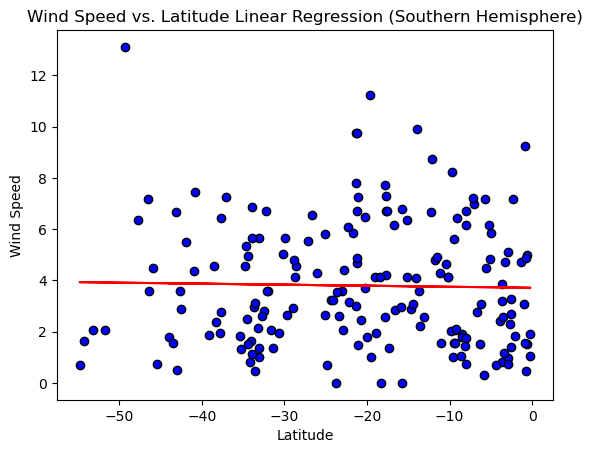

In [22]:
# Southern Hemisphere
latitudes = southern_hemi_df['Lat']
wind_speed = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, wind_speed)
regress_values = latitudes * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r_value = round(rvalue, 2)  # Extract and round the r-value
print(f"The r-value is: {r_value}")

plt.scatter(latitudes, wind_speed, marker='o', facecolors='blue', edgecolors='black')
plt.plot(latitudes, regress_values, "r-")
plt.annotate(f"{line_eq}", (20, 35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)')
plt.show()

**Discussion about the linear relationship:**

-Little to no correlation between wind speed and latitude in both hemispheres. Interestingly, there’s a very weak negative correlation between wind speed and latitude in the Southern Hemisphere when usually its always been positive correlations when finding data on this hemisphere; regardless, still a weak signal that does not lead to any strong conclusion.